In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
batch_size = 32

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C://Users/hmrav/Desktop/Research/archive/archive/train',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Acne','Eczema','HairLoss','Nail'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        'C://Users/hmrav/Desktop/Research/archive/archive/test',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Acne','Eczema','HairLoss','Nail'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')



Found 1536 images belonging to 4 classes.
Found 2647 images belonging to 4 classes.


In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


C:\Users\hmrav\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
total_sample1=train_generator.n
total_sample2=test_generator.n

n_epochs = 7

history = model.fit(
        train_generator, 
        steps_per_epoch=(total_sample1/batch_size),  
        epochs=n_epochs,
        validation_data=test_generator, 
        validation_steps=(total_sample2/batch_size),
        verbose=1)


Epoch 1/7
48/48 [==============================] - 111s 2s/step - loss: 1.1959 - acc: 0.4674 - val_loss: 0.6623 - val_acc: 0.6804
Epoch 2/7
48/48 [==============================] - 106s 2s/step - loss: 0.7204 - acc: 0.7370 - val_loss: 0.3144 - val_acc: 0.9040
Epoch 3/7
48/48 [==============================] - 106s 2s/step - loss: 0.5084 - acc: 0.8164 - val_loss: 0.5806 - val_acc: 0.8130
Epoch 4/7
48/48 [==============================] - 105s 2s/step - loss: 0.2908 - acc: 0.9121 - val_loss: 0.4065 - val_acc: 0.9044
Epoch 5/7
48/48 [==============================] - 104s 2s/step - loss: 0.2670 - acc: 0.9089 - val_loss: 0.8823 - val_acc: 0.7423
Epoch 6/7
48/48 [==============================] - 104s 2s/step - loss: 0.1003 - acc: 0.9720 - val_loss: 0.5929 - val_acc: 0.9090
Epoch 7/7
48/48 [==============================] - 107s 2s/step - loss: 0.2097 - acc: 0.9570 - val_loss: 0.6976 - val_acc: 0.9044


In [16]:
model.save('model.h5')

In [17]:
loss, accuracy = model.evaluate(test_generator)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

83/83 [==============================] - 32s 380ms/step - loss: 0.3354 - acc: 0.9052
Accuracy: 0.9051756858825684
Loss: 0.3353557288646698


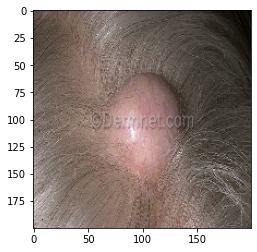

Seborrheic Keratoses


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('1.jpg', target_size = (200,200))
plt.imshow(test_image)
plt.show()
#test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][0] == 1:
    print("Acne")
elif result[0][1] == 1:
    print("Seborrheic Keratoses")
elif result[0][2] == 1:
    print("Hairloss")
elif result[0][3] == 1:
    print("Nail Fungs")

In [14]:
result

array([[0., 1., 0., 0.]], dtype=float32)

In [15]:
result  = np.argmax(result )

In [16]:
result

1